---
# <div align="center"><font color='green'> COSC 2753 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> Week 3 Lab Exercises: **Training a Regression Model**</font></div>
---

# Introduction

Last week we learned how to read the data and do exploratory data analysis (EDA). The next step in a typical machine learning pipeline is to split data and transform so that we can feed the data to a learning algorithm. 

The lab assumes that you have completed ``Week 02 lab: Reading data & Exploratory Data Analysis (EDA)``. If you haven't yet, please do so before attempting this lab. 

The lab can be executed on either your own machine (with anaconda installation) or computer lab. 
- Please refer canvas for instructions on installing anaconda python


## Objective
- Continue to familiarise with Python and other ML packages
- Learn to split the data to training/validation and test sets
- Important considetations in splitting the data
- Learn to train a model for regression and complete the introduction to model development pipeline.


## Dataset

We examine two regression based datasets in this lab. The first one is to do with house prices, some factors
associated with the prices and trying to predict house prices. The second dataset is predicting the amount of
share bikes hired every day in Washington D.C., USA, based on time of the year, day of the week and weather
factors. These datasets are available in `housing.data.csv` and `bikeShareDay.csv` in the code repository. 

First, ensure the two data files are located within the Jupyter workspace. 
- If you are on the local machine copy the two data data directories (`BostonHousingPrice`,`Bike-Sharing-Dataset`) to your current folder.

In this course we mostly use datasets that are collected by a third party. If you are interested in collecting your own data for your project, some useful information can be found at: [Introduction to Constructing Your Dataset](https://developers.google.com/machine-learning/data-prep/construct/construct-intro) 

# Problem Formulation

The first step in developing a model is to formulate the problem in a way that we can apply machine learning. To reiterate, the `task` in the Boston house price dataset is to predict the house price (`MEDV`), using some attributes of the house and neighbourhood. 

<span style="font-size:1.5em;">�</span> Observe the data and see if there is a pattern that would allow us to predict the house price using the attributes given? You can use the observations from the EDA for this.

<span style="font-size:1.5em;">�</span> What category does the task belong to?
> <span style="font-size:1em;">✔</span> **Task category:** 
> - supervised, univariate/multivariate regression 

> - We should use the insights gained from observing the data (EDA) in selecting the performance measure. e.g. are there outliers in target?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## TODO
bostonHouseFrame = pd.read_csv("housing.data.csv", delimiter="\s+")
print(bostonHouseFrame)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

The scikit-learn Python machine learning library provides an implementation of the train-test splitting via function `train_test_split()`. Lets use this to randomly split our data to 80% train set and 20% test set.

# Univariate Regression
We will first study how to do univariate regression.

If you recall from the last lab, we found that possibly the ‘RM’ (number of rooms) and ‘LSTAT’ (unsure) variables seem to have a linear relationship with the house price (‘MEDV’). Hence, we will try these variables as the independent variable to predict the house price, i.e., the dependent variable.



- Create an independent variable that is just based on the ‘RM’ column and a dependent variable of ‘MEDV’. 
- Assign the values of the 'RM' column to a variable named 'house_uniRM_x' and assign the values of the 'MEDV' column to a variable named 'house_y'.

<span style="font-size:1.5em;">�</span> There are at least three ways to create the house_uniRM_x and house_y variables based on those columns. Do some quick online research to slice the bostonHousePrice dataset and extract the two columns, by using the following methods: 
- (1) using square brackets []
- (2) using the pandas function .loc
- (3) using the pandas function .iloc

In [4]:
#print(bostonHouseFrame)
#house_uniRM_x = bostonHouseFrame.loc[:,'RM']
#house_uniRM_x= house_uniRM_x.values.reshape(-1,1)
house_uniRM_x = bostonHouseFrame[['RM']]
house_y = bostonHouseFrame['MEDV']

In [5]:
print(house_y)
print(house_uniRM_x.shape)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
(506, 1)


Next, we want to create some data to train the model, and some other data to evaluate how good the model is. We may be tempted to use 100% of the data for training, then select a subset for evaluation (say 20% of the data). However, we will find out later that this isn’t a good idea generally, as the data we use to test is the same we use to train, and likely to cause overfitting and what is called bias. We will discuss this more in a later week, but for now, just note that it isn’t a good idea to do so. 

Instead, we will split the data into a training set, which we use to fit the model/hypothesis, and a testing set, which we will use to evaluate the performance of the fitted model/hypothesis. There should be no overlap between the two sets. How we achieve this is typically randomly split the data, say 80% for training and 20% for testing. We can do this ourselves, but like many machine learning functionality these days, they are already implemented, and of course, they are available in the libraries we have imported.

# Data Splitting

As we have discussed in the lecture, in supervised learning we are interested in learning a model using our dataset that can predict the target value for unseen data (Not in the training set). This is called **generalization**. How can we test if the model we developed with our training data would generalize? One approach we can use is to **hold some data from the training process** (Hypothetical unseen data). This hold out data subset (split) is called the `"Test set"` and the remaining data is called the `”Training set"`. The training set may be further subdivided, but more on this later in the regularization lecture. We can use the "Test set" at the end of the development phase to test our model and see if it generalizes.  

- **Training set:** Is applied to train, or fit, your model. For example, you use the training set to find the optimal weights, or coefficients, for linear regression, logistic regression, or neural networks.
- **Test set:** Needed for an unbiased evaluation of the final model.


> **<span style="font-size:1.5em;">⚠</span> Warning: The test set should be independent and identically distributed with respect to the training data**  
> - Should make sure that there is no leakage between the two sets (overlapped train and test instances). This will give unrealistically high performance metric values for your model. e.g. In house price prediction, there may be a house that was sold multiple times and, you might include some instances of this house in the train set and some in the test set. This will result in data leakage.  
> - There should be no underlying differences between the two distributions. In other words the characteristics of the test set should not be different to that of the train set. For example all the houses sold in winter in train set and all the houses sold on summer in another set (generally, there is a difference in house prices sold in winter vs summer).
> - More on this in the lectures. 

> **<span style="font-size:1.5em;">⚠</span> Warning: The test data should NOT be used for any aspect of the model development process (training).**  
> This includes hyper parameter tuning and model selection (a separate validation set should be used for them).  

## Random splitting
In machine learning, the most common approach taken to split the dataset in to do random sampling (random split). In random sampling we allocate some data instances (selected randomly) to train set and the other instances to test set.  One key configuration parameter in this process: what should be the size of the train set and test set respectively.  This is most commonly expressed as a percentage between 0 and 1 for either the train or test datasets. For example, a training set with the size of 0.67 (67 percent) means that the remainder percentage 0.33 (33 percent) is assigned to the test set.

There is no optimal split percentage.

You must choose a split percentage that meets your project’s objectives with considerations that include:

- Computational cost in training/evaluation the model.
- Training set/Test set representativeness.

Nevertheless, common split percentages include:

- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50% (rarely)

Lets first load the house price dataset.  
<span style="font-size:1.5em;">�</span>Use the knowledge from the last week to load the dataset into a pandas dataframe named `bostonHouseFrame`.

In [2]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    bostonHouseTrainFrame, bostonHouseTestFrame = train_test_split(bostonHouseFrame, test_size=0.2, shuffle=True)


In [3]:
print("Nunber of instances in the original dataset is {}. After spliting Train has {} instances and test has {} instances."
      .format(bostonHouseFrame.shape[0], bostonHouseTrainFrame.shape[0], bostonHouseTestFrame.shape[0]))

Nunber of instances in the original dataset is 506. After spliting Train has 404 instances and test has 102 instances.


## Checking your splits
As discussed, random splitting may lead to leakage (two splits are not independent). We need to understand the dataset to make sure there are no hidden sources of leakage in the data. This is one place we can use the knowledge we gained through the EDA.

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Use the EDA observations from last week to see if there is any issue with the random splitting process.</font>**  

We can use histogram plots to see if the two partitions (splits) are identically distributed. 

<span style="font-size:1.5em;">�</span> Use the knowledge from last week to plot the histograms for each attribute for the two splits. Use different colors for test vs train

In [ ]:
## TODO



<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 
> - The distribution of train set attributes is approximately equal to the distribution of test set attributes. 


> <span style="font-size:1.5em;">⚠</span> **Warning: Make sure you use the same bins for both plots (test/train)** 

Now you know how to randomly split the data. Random splitting is not the only method to split data. The method used may vary based on many factors like problem type, nature of data etc. For example if we have time series data, we can use [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html). It is also common in ML to write your own custom function to do data splitting where special measures are required to keep the data independent or identical. 

In [11]:
# create testing and training data for RM variable
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(house_uniRM_x, house_y, test_size=0.2,shuffle=True)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(404, 1)
(102, 1)
(404,)
(102,)


The function that does the work is ‘train_test_split()’, part of sklearn.model_selection package. It essentially does what we desire, with the first two arguments to it are the X and Y variable datasets respectively (they must be of the same number of rows/instances), and a test_size parameter which specifies how big the test dataset is (in this case, 20% of the data, which is a typical setting for this). This function returns ‘trainX’ (training data of the X variable), ‘testX’ (testing data of X), ‘trainY’ (training data of Y) and ‘testY’ (testing data of Y). The last four statements just print out the size of the resulting training and testing datasets to show you that the training (test) datasets contain the same number of rows. We will use trainX and trainY to train the linear regression model, then textX and testY for testing and evaluation.


We are now ready to construct the linear regression model/hypothesis and fit the theta parameters.

In [12]:
from sklearn import linear_model
linReg = linear_model.LinearRegression()

This constructs the linear regression model object, assigned to variable ‘linReg’. We then fit the training data to the model:



In [13]:
linReg.fit(trainX, trainY)

LinearRegression()

linReg.fit() fits the X and Y training data and optimises the parameters to minimise the loss function. It might not exactly use gradient descent, but the ideas are similar and as stated in lectures, gradient descent as a general optimisation is the crux of many optimisation and parameter fitting algorithms.




Let's have a look at what the parameters look like:

In [14]:
print(linReg.intercept_)
print(linReg.coef_)

-34.832824008767446
[9.12895286]


linReg.intercept_ is the y-intercept, or essentially the theta parameter. 

linReg.coef_ is the slope of the univariate linear regression line or the theta_one variable.

With a model/hypothesis, we can now do prediction! We use the testing data for that:

In [15]:
pred_uniRM_y = linReg.predict(testX)

Okay, we now have predictions, but how did we go? What we want to do is to compare the predicted value from our model (given testX) with the actual Y values (testY). We can estimate the error (using the mean squared error loss function we been discussing in lectures for fitting the parameters), as follows:

In [16]:
from sklearn.metrics import mean_squared_error
print('Mean squared error ', mean_squared_error(testY, pred_uniRM_y))

Mean squared error  44.439188577995544


What is the mean squared error value you obtained?

In addition, it is useful for regression to plot the testing data against the model/hypothesis, which is a line in our univariable linear regression. Type in the following:

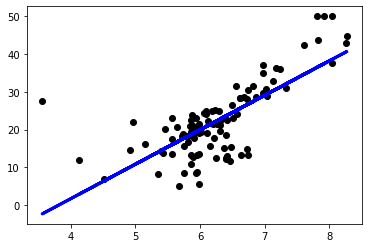

In [17]:
plt.scatter(testX, testY, color='black')
plt.plot(testX, pred_uniRM_y, color='blue', linewidth=3)

This uses our reliable plotting package matplotlib and pyplot to first, produce a scatterplot of our testing data (X,Y) pairs, then draw a blue line for our model/hypothesis. What information does the plot visualise?

Another interesting visualisation and based on the same information is the residual plot, which shows what is the difference in predicted and actual values, across different X values, for the testing data;

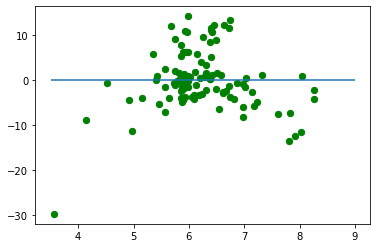

In [18]:
plt.scatter(testX, linReg.predict(testX) - testY, c='g', s=40)
plt.hlines(y=0, xmin=3.5, xmax=9)

If the model is perfect, then for each testing data then there is 0 residual (or 0 error between predicted versus actual), which is represented by the horizontal line in the diagram. If the model under-estimates the actual value, it will be below this horizontal line, and if over-estimates, than above. This plot can quickly give you a sense of where the errors are occurring and whether there are outlier points that are causing large errors (we will examine this later in the course and ways to deal with this).


> **<font color='red'><span style="font-size:1.5em;">☞</span> With your dataframe slicing skill, can you count the number of residuals that are larger than zero and those that are smaller than zero?





## Further exercies
We have fitted a linear regression model/hypothesis for the ‘RM’ variable. Use the seaborn package to visualise the correlation plot and identify the next potential predictor of the house price. You should identify 'LSTAT' as the next potential predictor. Why is it?

Repeat the above analysis using the ‘LSTAT’ variable, and comment on which predictor you think is performing better. LSTAT variable has a negative (inverse) linear relationship with ‘MEDV’, where when LSTAT increases MEDV decreases – do you think it matters?





## Multivariate Regression

So far, we have only used one X variable to predict MEDV. What if we used all the variables? To create such data, we first do the following:



In [17]:
house_multi_X = bostonHouseFrame.drop('MEDV', axis=1)
house_multi_Y = bostonHouseFrame[['MEDV']]

In [18]:
print(house_multi_X.shape)
print(house_multi_Y.shape)

(506, 13)
(506, 1)


In [20]:
train_multi_X, test_multi_X, train_multi_Y, test_multi_Y = train_test_split(house_multi_X, house_multi_Y, test_size=0.2,shuffle=True)

The Y variable is the same, but the X variable is interesting. We use the drop() method of data frames, which essentially drops a column from it – in our case, we drop the ‘MEDV’ column. X is now a data frame without the MEDV column, print it out the check.

Now repeat the same analysis, noting that train_test_split(), linReg.fit() and linReg.predict() can work with multivariate linear regression (i.e. where we have multiple X variables) as well. Make sure you print out the intercept and coefficients, print(linReg.intercept_) print(linReg.coef_), to see what are the fits and do the mean squared error.

In [31]:
from sklearn import linear_model
multi_linReg = linear_model.LinearRegression()

In [32]:
history = multi_linReg.fit(train_multi_X, train_multi_Y)

In [33]:
print(history)

LinearRegression()


# Exercise: Work on the Bike Share Data

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Do the linear regression on the Bike Share Data.</font>**  
> Now you seen how to do this task for the house price dataset. Repeat the same process for the Daily
Bike Share rental data.


# Some other data pre-processing steps

> **<font color='red'><span style="font-size:1.5em;">☞</span> Goal: Do some pre-process steps before fitting the data for training


## Feature Scaling

In a typical dataset, you might have different numerical features with widely different ranges. For example during the EDA we discovered that the attribute NOX takes values in the range `[0,1]` whereas TAX takes values in the range `[0, 700]`. Furthermore, you may have some features that have a [skewed distribution](https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/). Such characteristics in data may sometimes cause problems for the learning algorithms (specially gradient based methods and distance based methods). Therefore it is common to use feature scaling.

> **<span style="font-size:1.5em;">⚠</span> Important: Feature scaling, is usually guided by the EDA.**  
> The histograms and other individual feature visualizations often provided useful information for feature scaling and can be used to justify one approach over another. 

Two most common methods employed for feature normalization are min-max scaling and standard scaling

 - **Min-max scaling:** An individual feature is transformed so that the values are mapped to the range `[0,1]`. [Ref](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 - **Standard scaling:** An individual feature is transformed so that the transformed values have zero mean and unit variance. [Ref](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

Lets apply the above two methods to the feature `RM` in boston house price dataset.

In [ ]:
import pandas as pd
bostonHouseFrame = pd.read_csv("housing.data.csv", delimiter="\s+")

In [23]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    bostonHouseTrainFrame, bostonHouseTestFrame = train_test_split(bostonHouseFrame, test_size=0.2, shuffle=True)



In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

MinMaxScaler_RM = MinMaxScaler().fit(bostonHouseTrainFrame[['RM']])
RM_minmax = MinMaxScaler_RM.transform(bostonHouseTrainFrame[['RM']])

StandardScaler_RM = StandardScaler().fit(bostonHouseTrainFrame[['RM']])
RM_standard = StandardScaler_RM.transform(bostonHouseTrainFrame[['RM']])

Now lets plot the feature distribution before and after to see the difference

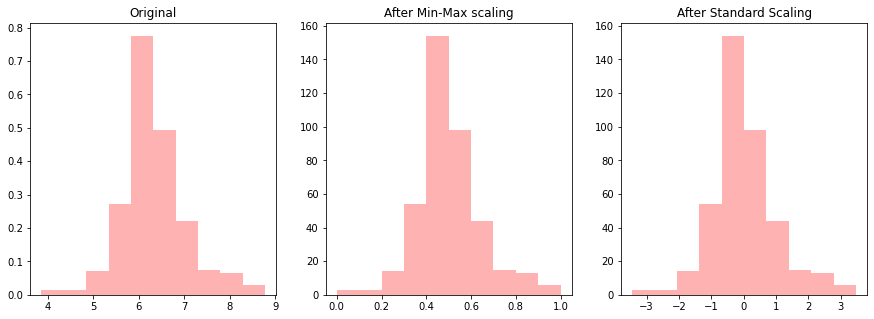

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(bostonHouseTrainFrame['RM'], alpha=0.3, color='r', density=True)
plt.title("Original")

plt.subplot(1,3,2)
plt.hist(RM_minmax, alpha=0.3, color='r')
plt.title("After Min-Max scaling")

plt.subplot(1,3,3)
plt.hist(RM_standard, alpha=0.3, color='r')
plt.title("After Standard Scaling")
plt.show()

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Both scaling methods do not change the shape of the feature distribution. They only change the range. 

lets go with min-max scaling.

> **<span style="font-size:1.5em;">⚠</span> Warning: When normalizing, ensure that the same scaling parameters are applied to all splits (train/test/validation).**  
> A common mistake is to use one set of scaling parameters to do the normalization of train data and another on test data. This happens if you apply `fit_transform()` function twice: ones to train set and again for test data.  
> The correct approach would be to do the fit() on train data and then apply the transform() to train set and test set separately, to scale the data. 

We can also use non linear transformation to map a feature that has a skewed distribution to have a distribution that is close to a gaussian. 

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Read this article on [skewed distribution](https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/).</font>**  

Lets try a non-linear transformation with attribute `DIS`

Text(0.5, 1.0, 'Power scaling')

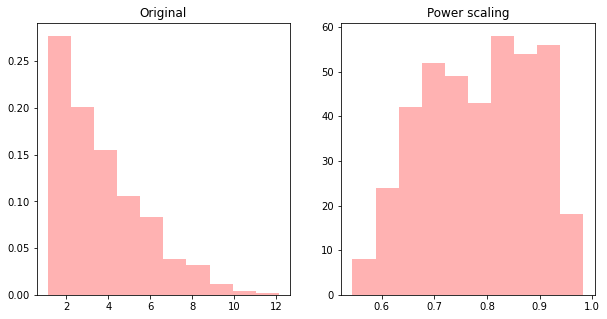

In [26]:
from sklearn.preprocessing import PowerTransformer

PowerTransformer_CRIM = PowerTransformer(method='yeo-johnson', standardize=False).fit(bostonHouseTrainFrame[['CRIM']])
RM_power = PowerTransformer_CRIM.transform(bostonHouseTrainFrame[['DIS']])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(bostonHouseTrainFrame['DIS'], alpha=0.3, color='r', density=True)
plt.title("Original")

plt.subplot(1,2,2)
plt.hist(RM_power, alpha=0.3, color='r')
plt.title("Power scaling")

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Select the appropriate feature scaling method for all numerical attributes in the boston house dataset.</font>**  

There are many other normalization techniques you can try. See [scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) for more information. 

There are also methods that can handle outliers. See [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).